## Color Graphics
Let's start with an empty array like before, but with three color channels from the beginning.
We use np.zeros to create a zero initialzed array and we set the data type to be uint8, which is a byte.

The color channels are RGB, so plain red is (255,0,0), plain green is (0,255,0) and plain blue is (0,0,255)

Gray values result from the same value in all channels. We use an intermediate value (127).

Once the image is created, we can show it and save it without a color map, as we are now using the full color specification. The display of the loaded image is identical to the constructed one (this is often not the case when using grayscale images with a color map) 


In [1]:
# First step is to load all required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import random
import os

Shape is  (40, 60, 3)
New image


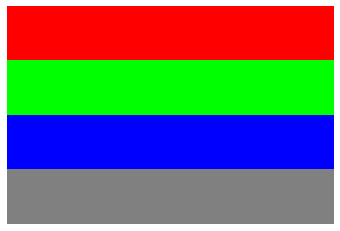

Saved image


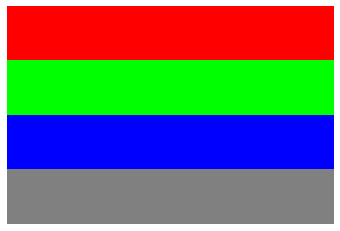

In [2]:
ROWS = 40
COLS = 60

a = np.zeros((ROWS,COLS,3),dtype="uint8")
print("Shape is ",a.shape)
RED = (255,0,0)
GREEN = (0,255,0)
BLUE = (0,0,255)
GRAY = (128,128,128)


# first 10 rows red
a[:10] = RED
# next 10 rows green
a[10:20] = GREEN
# next 10 rows green
a[20:30] = BLUE
# next 10 rows gray
a[30:] = GRAY

# show image
print("New image")
plt.imshow(a)
plt.axis("off")

# we save and load the image in the same fashion as before
# but we use "png" format which gives a better quality for the
# next chapter
TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)
    
file = "color1.png"
plt.imsave(os.path.sep.join([TARGET_DIR,file]),a)
plt.show()
b = plt.imread(os.path.sep.join([TARGET_DIR,file]))
print("Saved image")
plt.imshow(a)
plt.axis("off")
plt.show()


## Color Spaces
RGB colors are straightforward, as red, green and blue are the colors which are actually used by all modern display interfaces. However it is difficult to define *nice* gradients in color or intensity by mathematical operations. 

This is much easier when we use a different color space like *HSV*

 * H: HUE, the color value
 * S: Saturation
 * V: Value
 
 There are mathematical conversion to compute RGB from HSV and vice versa. We will just use the matplotlib color function to derive the RGB values.
 
 See [https://de.wikipedia.org/wiki/HSV-Farbraum](https://de.wikipedia.org/wiki/HSV-Farbraum)
 
 For demonstration we create a gradient in H and S, with a fixed V. The colors becomes stronger from left to right and we get a nice rainbow-like color sequence from top to bottom.
 
 Matplotlib wants HSV values as floats in the range ([0,1], so we have to convert the result back to bytes, as we have defined the array with datatype uint8. (We could use floats directly, but then we need to create the array accordingly)

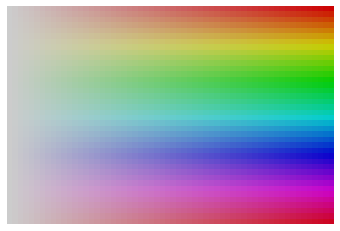

In [3]:
# make gradients for H and S matching the image dimensions
for r in range(ROWS):
    for c in range(COLS):
        h = r * 1/ROWS
        s = c * 1/COLS
        v = .8
        a[r,c] = (mcl.hsv_to_rgb((h,s,v))*256).astype("uint8")

plt.imshow(a)
_ = plt.axis("off")

## Summary
Color graphics works the same way, just the pixel values are now with three color channels R,G,B. 

HSV color space allows to apply simple math on color values.